In [2]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)
shuffle_split = ShuffleSplit(test_size=.2, train_size=.8, n_splits=10)

(1151, 19)

In [3]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.001,0.01,0.1,1,10,100,200],'C': [0.01,0.1,1,10, 100, 1000,2000,3000]}]
clf_svc_rbf = GridSearchCV(SVC(), tuned_parameters, cv=shuffle_split,  scoring='f1_micro', return_train_score=True)
clf_svc_rbf.fit(X_train_scaledMinMax, Y_train)
print("Best parameters set found on development set:")
print()
print(clf_svc_rbf.best_params_)
print()
print("mean training:")
print()
print(clf_svc_rbf.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_svc_rbf.cv_results_['mean_test_score'])
print("Final real Test set score: {:.2f}".format(clf_svc_rbf.score(X_test_scaledMinMax, Y_test)))

Best parameters set found on development set:

{'C': 2000, 'gamma': 0.1, 'kernel': 'rbf'}

mean training:

[ 0.53167702  0.53167702  0.53167702  0.53167702  0.53167702  0.53167702
  0.53167702  0.53167702  0.53167702  0.5378882   0.61552795  0.65978261
  0.53167702  0.53167702  0.53167702  0.54145963  0.61537267  0.69099379
  0.79673913  0.98447205  0.99860248  0.54068323  0.61537267  0.69813665
  0.78198758  0.90667702  1.          1.          0.61552795  0.69347826
  0.75496894  0.83959627  0.98354037  1.          1.          0.69037267
  0.73742236  0.80388199  0.90186335  1.          1.          1.
  0.69782609  0.7560559   0.8136646   0.91444099  1.          1.          1.
  0.70108696  0.76537267  0.8173913   0.92437888  1.          1.          1.        ]
mean test:

[ 0.52546584  0.52546584  0.52546584  0.52546584  0.52546584  0.52546584
  0.52546584  0.52546584  0.52546584  0.52795031  0.58509317  0.61614907
  0.52546584  0.52546584  0.52546584  0.52919255  0.60434783  0.66583

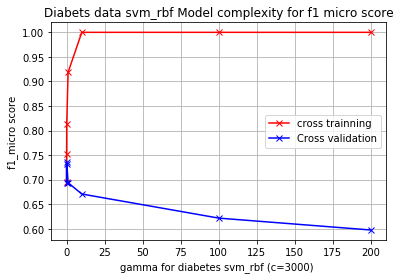

Text(0.5,1,'Diabets data svm_rbf Model complexity for f1 micro score')

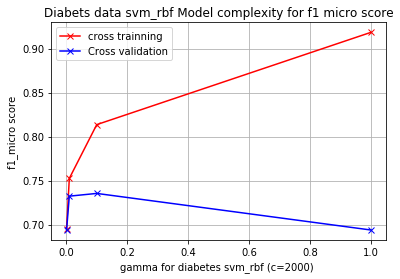

In [74]:
resultsRbf = pd.DataFrame(clf_svc_rbf.cv_results_)
rt=resultsRbf[resultsRbf['param_C']==2000]
b=rt['param_gamma'].values
plt.grid()
plt.plot(b,rt['mean_train_score'],'x-',color="r")
plt.plot(b,rt['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('gamma for diabetes svm_rbf (c=3000) ')
plt.ylabel('f1_micro score')
plt.title('Diabets data svm_rbf Model complexity for f1 micro score')
plt.show()
v=rt['mean_train_score'].values
v2=rt['mean_test_score'].values

plt.grid()
plt.plot([0.001,0.01,0.1,1],v[0:4],'x-',color="r")
plt.plot([0.001,0.01,0.1,1],v2[0:4],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('gamma for diabetes svm_rbf (c=2000) ')
plt.ylabel('f1_micro score')
plt.title('Diabets data svm_rbf Model complexity for f1 micro score')

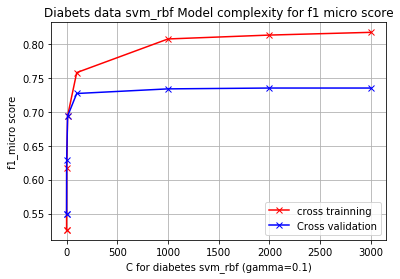

In [71]:
resultsRbf = pd.DataFrame(clf_svc_rbf.cv_results_)
rt=resultsRbf[resultsRbf['param_gamma']==0.1]
b=rt['param_C'].values
plt.grid()
plt.plot(b,rt['mean_train_score'],'x-',color="r")
plt.plot(b,rt['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('C for diabetes svm_rbf (gamma=0.1)')
plt.ylabel('f1_micro score')
plt.title('Diabets data svm_rbf Model complexity for f1 micro score')
plt.show()

Text(0,0.5,'score')

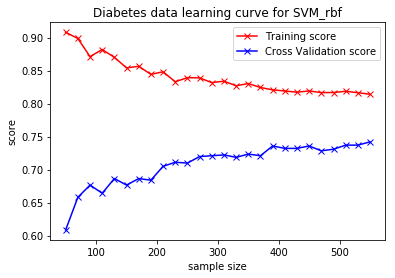

In [78]:
from sklearn.svm import SVC
sample_size=np.arange(50,560,20)
shuffle_split2 = ShuffleSplit(test_size=.1, train_size=.9, n_splits=10)
from sklearn.model_selection import learning_curve
samples, sample_train, sample_valid=learning_curve(SVC(kernel='rbf',gamma=0.1,C=2000 ), X_train_scaledMinMax, Y_train,  train_sizes=sample_size, cv=shuffle_split2)
plt.plot(samples, np.mean(sample_train,axis=1),'x-', color="r",label="Training score")
plt.plot(samples, np.mean(sample_valid,axis=1), 'x-', color="b",label="Cross Validation score")
plt.legend(loc="best")
plt.title('Diabetes data learning curve for SVM_rbf')
plt.xlabel('sample size')
plt.ylabel('score')

In [7]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['poly'],'degree': [1,2,3, 4, 5]}]
clf_svc_poly = GridSearchCV(SVC(), tuned_parameters, cv=shuffle_split,  scoring='f1_micro', return_train_score=True)
clf_svc_poly.fit(X_train_scaledMinMax, Y_train)
print("Best parameters set found on development set:")
print()
print(clf_svc_poly.best_params_)
print()
print("mean training:")
print()
print(clf_svc_poly.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_svc_poly.cv_results_['mean_test_score'])
print("Final real Test set score: {:.2f}".format(clf_svc_poly.score(X_test_scaledMinMax, Y_test)))

Best parameters set found on development set:

{'degree': 1, 'kernel': 'poly'}

mean training:

[ 0.58897516  0.53478261  0.53245342  0.53245342  0.53245342]
mean test:

[ 0.56521739  0.52484472  0.52236025  0.52236025  0.52236025]
Final real Test set score: 0.62


In [14]:
 #

In [13]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['poly'],'degree': [1,2,3],'C': [0.1,1,10, 100, 1000,2000,3000]}]
clf_svc_poly = GridSearchCV(SVC(), tuned_parameters, cv=shuffle_split,  scoring='f1_micro', return_train_score=True)
clf_svc_poly.fit(X_train_scaledMinMax, Y_train)
print("Best parameters set found on development set:")
print()
print(clf_svc_poly.best_params_)
print()
print("mean training:")
print()
print(clf_svc_poly.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_svc_poly.cv_results_['mean_test_score'])
print("Final real Test set score: {:.2f}".format(clf_svc_poly.score(X_test_scaledMinMax, Y_test)))

Best parameters set found on development set:

{'C': 2000, 'degree': 2, 'kernel': 'poly'}

mean training:

[ 0.5326087   0.5326087   0.5326087   0.59254658  0.54378882  0.5326087
  0.64285714  0.62142857  0.57717391  0.6992236   0.69875776  0.65046584
  0.73354037  0.74906832  0.7197205   0.74440994  0.76521739  0.74037267
  0.74751553  0.77282609  0.74829193]
mean test:

[ 0.52173913  0.52173913  0.52173913  0.5689441   0.52049689  0.52173913
  0.6378882   0.60496894  0.56086957  0.69130435  0.68322981  0.63602484
  0.7242236   0.73478261  0.70124224  0.73540373  0.7484472   0.71925466
  0.73850932  0.74534161  0.73167702]
Final real Test set score: 0.72


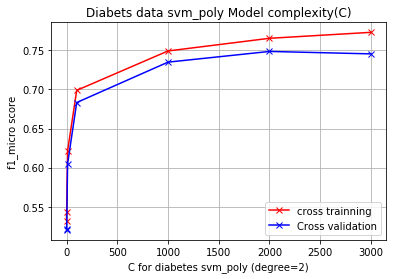

In [17]:
resultsPoly = pd.DataFrame(clf_svc_poly.cv_results_)
rt=resultsPoly[resultsPoly['param_degree']==2]
b=rt['param_C'].values
plt.grid()
plt.plot(b,rt['mean_train_score'],'x-',color="r")
plt.plot(b,rt['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('C for diabetes svm_poly (degree=2)')
plt.ylabel('f1_micro score')
plt.title('Diabets data svm_poly Model complexity(C)')
plt.show()

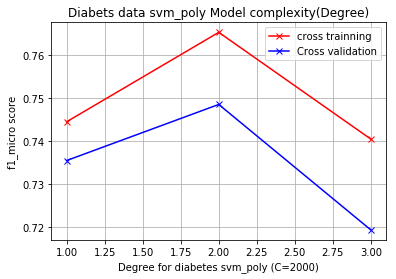

In [21]:
resultsPoly = pd.DataFrame(clf_svc_poly.cv_results_)
rt=resultsPoly[resultsPoly['param_C']==2000]
b=rt['param_degree'].values
plt.grid()
plt.plot(b,rt['mean_train_score'],'x-',color="r")
plt.plot(b,rt['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('Degree for diabetes svm_poly (C=2000)')
plt.ylabel('f1_micro score')
plt.title('Diabets data svm_poly Model complexity(Degree)')
plt.show()

In [40]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['poly'],'degree': [2],'C': [2000],'coef0':[-0.8,-0.4,-0.2,0,0.2,0.4,0.8]}]
clf_svc_poly2 = GridSearchCV(SVC(), tuned_parameters, cv=shuffle_split,  scoring='f1_micro', return_train_score=True)
clf_svc_poly2.fit(X_train_scaledMinMax, Y_train)
print("Best parameters set found on development set:")
print()
print(clf_svc_poly2.best_params_)
print()
print("mean training:")
print()
print(clf_svc_poly2.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_svc_poly2.cv_results_['mean_test_score'])
print("Final real Test set score: {:.2f}".format(clf_svc_poly2.score(X_test_scaledMinMax, Y_test)))

Best parameters set found on development set:

{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel': 'poly'}

mean training:

[ 0.49627329  0.49689441  0.49953416  0.77484472  0.78524845  0.79145963
  0.79534161]
mean test:

[ 0.50124224  0.5         0.49627329  0.70993789  0.71677019  0.71490683
  0.72236025]
Final real Test set score: 0.75


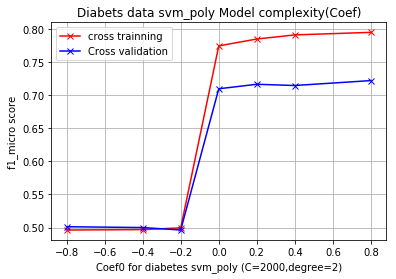

In [41]:
rt = pd.DataFrame(clf_svc_poly2.cv_results_)
b=rt['param_coef0'].values
plt.grid()
plt.plot(b,rt['mean_train_score'],'x-',color="r")
plt.plot(b,rt['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('Coef0 for diabetes svm_poly (C=2000,degree=2)')
plt.ylabel('f1_micro score')
plt.title('Diabets data svm_poly Model complexity(Coef)')
plt.show()

/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

Text(0,0.5,'score')

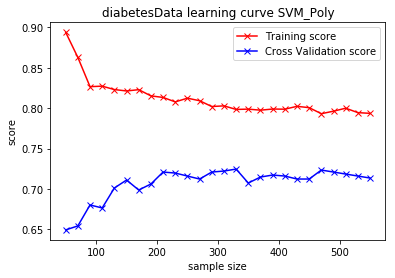

In [4]:
from sklearn.svm import SVC
sample_size=np.arange(50,560,20)
shuffle_split2 = ShuffleSplit(test_size=.1, train_size=.9, n_splits=10)
from sklearn.model_selection import learning_curve
samples, sample_train, sample_valid=learning_curve(SVC(kernel='poly',max_iter=30000, degree=2,C=2000,coef0=0.8), X_train_scaledMinMax, Y_train,  train_sizes=sample_size, cv=shuffle_split2)
plt.plot(samples, np.mean(sample_train,axis=1),'x-', color="r",label="Training score")
plt.plot(samples, np.mean(sample_valid,axis=1), 'x-', color="b",label="Cross Validation score")
plt.legend(loc="best")
plt.title('diabetesData learning curve SVM_Poly')
plt.xlabel('sample size')
plt.ylabel('score')

 


In [93]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['poly'],'degree': [2],'C': [2000],'coef0':[0.8],'max_iter':[2000,4000,6000,10000,30000,40000,50000,100000]}]
clf_svc_poly3 = GridSearchCV(SVC(), tuned_parameters, cv=shuffle_split,  scoring='f1_micro', return_train_score=True)
clf_svc_poly3.fit(X_train_scaledMinMax, Y_train)
print("Best parameters set found on development set:")
print()
print(clf_svc_poly3.best_params_)
print()
print("mean training:")
print()
print(clf_svc_poly3.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_svc_poly3.cv_results_['mean_test_score'])
print("Final real Test set score: {:.2f}".format(clf_svc_poly3.score(X_test_scaledMinMax, Y_test)))

/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceW

Best parameters set found on development set:

{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel': 'poly', 'max_iter': 30000}

mean training:

[ 0.78121118  0.78726708  0.78944099  0.78959627  0.78913043  0.78897516
  0.78897516  0.78897516]
mean test:

[ 0.74347826  0.77080745  0.76956522  0.77267081  0.77329193  0.77329193
  0.77329193  0.77329193]
Final real Test set score: 0.75


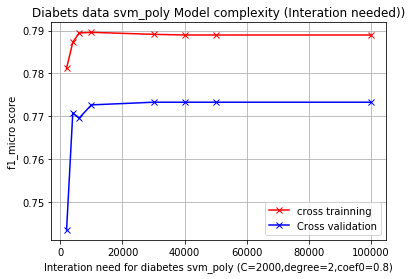

In [94]:
rt = pd.DataFrame(clf_svc_poly3.cv_results_)
b=rt['param_max_iter'].values
plt.grid()
plt.plot(b,rt['mean_train_score'],'x-',color="r")
plt.plot(b,rt['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('Interation need for diabetes svm_poly (C=2000,degree=2,coef0=0.8)')
plt.ylabel('f1_micro score')
plt.title('Diabets data svm_poly Model complexity (Interation needed))')
plt.show()

In [49]:
display(rt)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_coef0,param_degree,param_kernel,param_max_iter,params,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.002268,0.001543,0.518634,0.512888,2000,0.8,2,poly,10,"{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel...",...,0.397516,0.476708,0.583851,0.599379,0.521739,0.492236,0.001258,0.000443,0.080182,0.059483
1,0.002500,0.001178,0.496894,0.495031,2000,0.8,2,poly,50,"{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel...",...,0.385093,0.444099,0.422360,0.440994,0.459627,0.442547,0.001087,0.000865,0.082774,0.045984
2,0.002724,0.001261,0.514286,0.509161,2000,0.8,2,poly,100,"{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel...",...,0.583851,0.571429,0.434783,0.468944,0.546584,0.487578,0.000281,0.000377,0.062840,0.049895
3,0.007571,0.001695,0.586335,0.590062,2000,0.8,2,poly,500,"{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel...",...,0.590062,0.605590,0.534161,0.586957,0.602484,0.596273,0.000462,0.000224,0.056668,0.026940
4,0.011550,0.001851,0.650311,0.657453,2000,0.8,2,poly,1000,"{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel...",...,0.664596,0.655280,0.590062,0.656832,0.689441,0.737578,0.000649,0.000177,0.031062,0.032640
5,0.016823,0.002019,0.737888,0.779037,2000,0.8,2,poly,2000,"{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel...",...,0.788820,0.773292,0.714286,0.776398,0.739130,0.788820,0.001292,0.000239,0.025428,0.012089
6,0.020578,0.001913,0.749689,0.792081,2000,0.8,2,poly,4000,"{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel...",...,0.795031,0.788820,0.745342,0.793478,0.732919,0.793478,0.001616,0.000373,0.030052,0.004471
7,0.021262,0.001707,0.753416,0.793323,2000,0.8,2,poly,6000,"{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel...",...,0.795031,0.788820,0.745342,0.790373,0.739130,0.791925,0.001763,0.000104,0.028334,0.003140
8,0.024003,0.001639,0.752795,0.791925,2000,0.8,2,poly,10000,"{'C': 2000, 'coef0': 0.8, 'degree': 2, 'kernel...",...,0.788820,0.782609,0.745342,0.795031,0.732919,0.788820,0.001918,0.000035,0.027045,0.005243


In [50]:
display(resultsRbf)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.017573,0.003788,0.537888,0.528571,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",45,0.565217,...,0.571429,0.520186,0.527950,0.531056,0.590062,0.515528,0.003531,0.000413,0.032417,0.008104
1,0.015374,0.003512,0.537888,0.528571,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",45,0.565217,...,0.571429,0.520186,0.527950,0.531056,0.590062,0.515528,0.001617,0.000431,0.032417,0.008104
2,0.016540,0.004190,0.538509,0.535870,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",44,0.565217,...,0.571429,0.520186,0.527950,0.531056,0.596273,0.588509,0.002208,0.000871,0.033454,0.018832
3,0.014765,0.003811,0.584472,0.622360,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",41,0.608696,...,0.583851,0.644410,0.621118,0.619565,0.546584,0.636646,0.001079,0.000814,0.027701,0.016634
4,0.015482,0.003681,0.630435,0.651708,0.1,10,rbf,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",30,0.583851,...,0.658385,0.672360,0.658385,0.650621,0.645963,0.667702,0.001179,0.000268,0.040468,0.013924
5,0.018636,0.003727,0.537888,0.528571,0.1,100,rbf,"{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}",45,0.565217,...,0.571429,0.520186,0.527950,0.531056,0.590062,0.515528,0.001232,0.000299,0.032417,0.008104
6,0.022502,0.004426,0.537888,0.528571,0.1,200,rbf,"{'C': 0.1, 'gamma': 200, 'kernel': 'rbf'}",45,0.565217,...,0.571429,0.520186,0.527950,0.531056,0.590062,0.515528,0.004056,0.001001,0.032417,0.008104
7,0.015861,0.003837,0.537888,0.528571,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",45,0.565217,...,0.571429,0.520186,0.527950,0.531056,0.590062,0.515528,0.000956,0.000319,0.032417,0.008104
8,0.015834,0.003547,0.539752,0.539441,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",42,0.565217,...,0.577640,0.524845,0.527950,0.531056,0.602484,0.619565,0.001918,0.000403,0.035185,0.027438
9,0.015867,0.003971,0.594410,0.620031,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",34,0.608696,...,0.596273,0.639752,0.633540,0.622671,0.552795,0.621118,0.000426,0.000469,0.030180,0.012539


In [80]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.001,0.01,0.1,1,10,100,200],'C': [0.01,0.1,1,10, 100, 1000,2000,3000]}]
clf_svc_rbf = GridSearchCV(SVC(), tuned_parameters, cv=shuffle_split,  scoring='f1_micro', return_train_score=True)
clf_svc_rbf.fit(X_train_scaledStandard, Y_train)
print("Best parameters set found on development set:")
print()
print(clf_svc_rbf.best_params_)
print()
print("mean training:")
print()
print(clf_svc_rbf.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_svc_rbf.cv_results_['mean_test_score'])
print("Final real Test set score: {:.2f}".format(clf_svc_rbf.score(X_test_scaledStandard, Y_test)))

Best parameters set found on development set:

{'C': 3000, 'gamma': 0.001, 'kernel': 'rbf'}

mean training:

[ 0.53090062  0.53090062  0.53090062  0.53090062  0.53090062  0.53090062
  0.53090062  0.53090062  0.59720497  0.6552795   0.53090062  0.53090062
  0.53090062  0.53090062  0.59363354  0.67142857  0.77049689  0.93043478
  1.          1.          1.          0.66708075  0.75186335  0.85714286
  0.99984472  1.          1.          1.          0.72888199  0.80232919
  0.94083851  1.          1.          1.          1.          0.77919255
  0.84953416  0.9886646   1.          1.          1.          1.
  0.78742236  0.87158385  0.99704969  1.          1.          1.          1.
  0.7947205   0.88043478  0.9992236   1.          1.          1.          1.        ]
mean test:

[ 0.52857143  0.52857143  0.52857143  0.52857143  0.52857143  0.52857143
  0.52857143  0.52857143  0.57763975  0.63167702  0.52857143  0.52857143
  0.52857143  0.52857143  0.57888199  0.66273292  0.68136646  0.642